In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import camera
import utils
import genpom

the intrinsics are in cm

Extrinsics kept in 'cm'.
Intrinsics scaled from (1080, 1920) to (360, 640).
[[113.96779643 185.64358634]
 [ 92.94404574  88.02680652]]


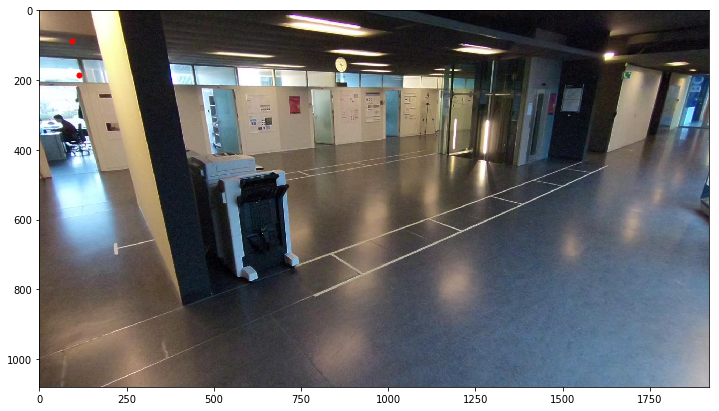

In [4]:
path = "/home/leo/Desktop/20180207/calibration/"

cam0 = camera.Camera.from_json(path+"/gopro6.0/intrinsics.json", 
                               path+"/gopro6.0/extrinsics.json",
                              (1080/3.0,1920/3.0),
                              "cm")

points = np.array([[0,0,0],[0,0,180]])

image_points = cam0.project_points(points)
print(image_points)

img = utils.load_image("/home/leo/Desktop/20180207/calibration/gopro6.0/frame_0_1_1.JPG")

plt.figure(figsize=(12,12))
plt.imshow(img)
plt.plot(image_points[:,0], image_points[:,1], 'r.', markersize=10)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
cilinder = genpom.Cilinder(16, 180, (0,0), "cm")

points = cilinder.points()

rectangle = cilinder.project_with(cam0)
print(rectangle)

plt.figure()
plt.plot(rectangle.points()[:,0], rectangle.points()[:,1], 'r.')

TypeError: __init__() takes from 3 to 4 positional arguments but 5 were given